In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# DIVIDE EVERY VALUE WITH MAXIMUM VALUTE TO GET THE FORM OF 0-1 VALUES

In [53]:
marks = [23,34,56,34,76,34,25,56,54,75,80,85,73,45,65,78,34,23,67]
data=pd.DataFrame(marks)
data

,0
0,23
1,34
2,56
3,34
4,76
5,34
6,25
7,56
8,54
9,75


In [55]:
import math
mean_ = math.floor(data.describe().mean()[0])
mean_

45

In [57]:

data['scaled_value'] = 0
data['scaled_value'] = data[0]/mean_
data

,0,scaled_value
0,23,0.511111
1,34,0.755556
2,56,1.244444
3,34,0.755556
4,76,1.688889
5,34,0.755556
6,25,0.555556
7,56,1.244444
8,54,1.200000
9,75,1.666667


# STANDERDIZATION

DATA DISTRIBUTION SHOULD BE  NORMAL GAUSSIAN DISTRIBUTION

by 

         z-score =   X-MEAN
                   ----------
                       STD 

### making normal distribution type data by numpy

In [178]:
import numpy as np
data = np.random.normal(loc = 0, scale = 1, size = 1000)

In [180]:
df = pd.DataFrame(data)
df

,0
0,-1.032804
1,-0.615962
2,2.035338
3,0.519243
4,-1.930477
...,...
995,-0.213067
996,0.234184
997,1.567470
998,-0.064181


<Axes: xlabel='0', ylabel='Count'>

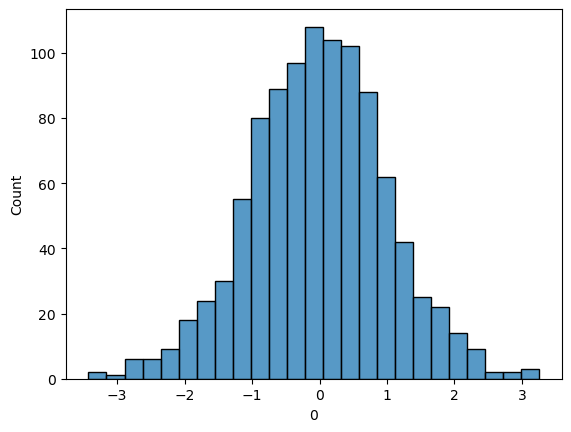

In [182]:
sns.histplot(df[0])

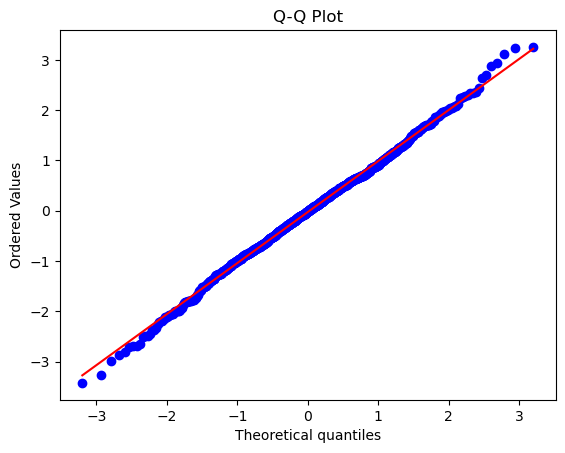

In [184]:
import scipy.stats as stats
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

<Axes: ylabel='0'>

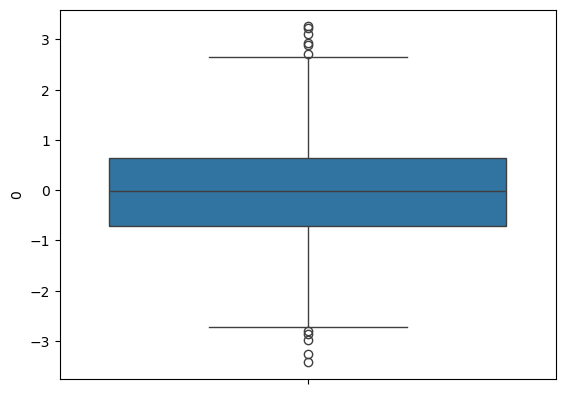

In [186]:
sns.boxplot(df[0])

##  Removing outlier 

In [189]:
def remove_outlier(data, column):
    min,q1,median,q3,max = np.quantile(data,[0,0.25,0.50,0.75,1.0])
    iqr = q3 - q1
    lower_fence = q1-1.5*(iqr)
    higher_fence = q3+1.5*(iqr)
    filter_data = data[(data[0] >= lower_fence) & (data[0] <= higher_fence)]
    return filter_data

# df['cleaned_data'] = remove_outlier(df,df[0])
df['cleaned_data']

0     -1.032804
1     -0.615962
2      2.035338
3      0.519243
4     -1.930477
         ...   
995   -0.213067
996    0.234184
997    1.567470
998   -0.064181
999    1.708967
Name: cleaned_data, Length: 1000, dtype: float64

<Axes: ylabel='cleaned_data'>

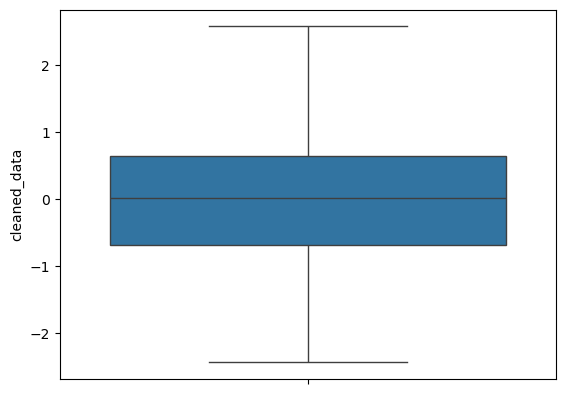

In [128]:
sns.boxplot(df['cleaned_data'])

<Axes: xlabel='cleaned_data', ylabel='Count'>

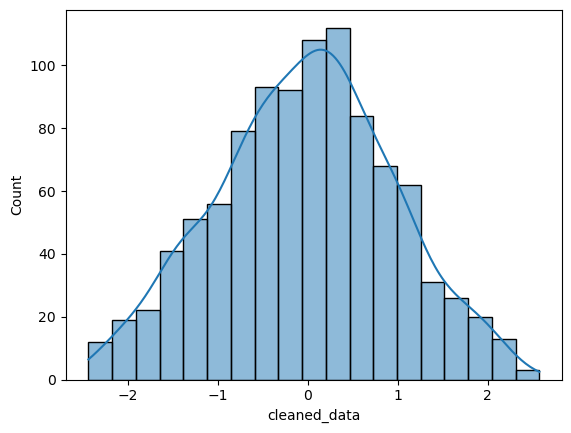

In [136]:
sns.histplot(df['cleaned_data'], kde = True)

## handling missing value

In [197]:
df.isnull().sum()

0               0
cleaned_data    0
dtype: int64

In [199]:
df['cleaned_data'].fillna(df['cleaned_data'].mean(), inplace = True)
df.isnull().sum()

0               0
cleaned_data    0
dtype: int64

### STANDARDIZATION TECHNIQUE

In [250]:
from sklearn.preprocessing import StandardScaler

In [252]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[['cleaned_data']]) #2d array aaahn expect cheyya

In [254]:
d1 = pd.DataFrame(standardized_data)

<Axes: xlabel='0', ylabel='Count'>

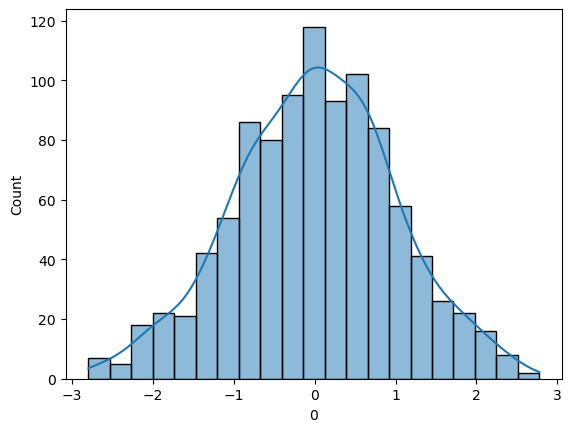

In [256]:
sns.histplot(d1[0],kde = True)

In [258]:
d1.describe()

,0
count,1.000000e+03
mean,1.421085e-17
std,1.000500e+00
min,-2.794730e+00
25%,-6.840581e-01
50%,3.803370e-03
75%,6.778601e-01
max,2.777517e+00


In [263]:
d1.median()

0    0.003803
dtype: float64

# NORMALIZATION

CAN USE BY ANY DISTRIBUTION

      Xnormal =    X - Xmin
                --------------     EG :   
                 Xmax - Xmin

In [231]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['cleaned_data']])

In [239]:
pd.DataFrame(normalized_data)

,0
0,0.314355
1,0.392114
2,0.886692
3,0.603877
4,0.146902
...,...
995,0.467271
996,0.550702
997,0.799415
998,0.495044
